In [16]:
%matplotlib notebook
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from distiller import *

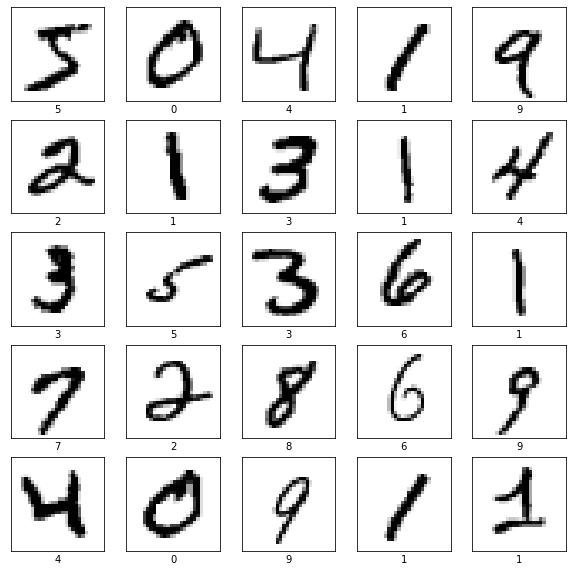

(10000, 28, 28, 1)


In [17]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train[:10000, :, :]
y_train = y_train[:10000]
x_test = x_test[:3000, :, :]
y_test = y_test[:3000]

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]
print(x_train.shape)
train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)).shuffle(1000).batch(32)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

In [18]:
def teacherModel():
    teacher = models.Sequential()
    teacher = models.Sequential()
    teacher.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    teacher.add(layers.MaxPooling2D((2, 2)))
    teacher.add(layers.Conv2D(32, (3, 3), activation='relu'))
    teacher.add(layers.MaxPooling2D((2, 2)))
    teacher.add(layers.Flatten())
    teacher.add(layers.Dense(56, activation='relu'))
    # teacher.add(layers.Dropout(rate=0.2))
    teacher.add(layers.Dense(56, activation='relu'))
    # teacher.add(layers.Dropout(rate=0.2))
    teacher.add(layers.Dense(56, activation='relu'))
    # teacher.add(layers.Dropout(rate=0.2))
    teacher.add(layers.Dense(56, activation='relu'))
    teacher.add(layers.Dense(10, name='teacher_logits'))
    
    # teacher.compile(optimizer='adam',
    #           loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    #           metrics=['accuracy'])
    return teacher

In [19]:
teacher = teacherModel()
dis = Distiller(teacher, models.clone_model(teacher), x_train, y_train, x_test, y_test, task_balance=0.8)

In [ ]:
history = dis.run()

training teacher network...

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 1, Train Loss: 1.3030903339385986, Train Accuracy: 53.79999923706055, Test Loss: 0.6182100176811218, Test Accuracy: 79.40999603271484
Epoch 2, Train Loss: 0.44953086972236633, Train Accuracy: 85.53333282470703, Test Loss: 0.3847123682498932, Test Accuracy: 88.34000396728516
Epoch 3, Train Loss: 0.2628781795501709, Train Accuracy: 91.29999542236328, Test Loss: 0.24160976707935333, Test Accuracy: 92.95999908447266
Epoch 4, Train Loss: 0.15942984819412231, Train Accuracy: 